In [57]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import regularizers 
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score
import keras
import tensorflow as tf

sequential_data = np.load("Signals.npz", allow_pickle=True)["a"].item()
train_data = pd.read_csv("metadata_train.csv")

#test_data = pd.read_csv("metadata_test.csv")

y = train_data['CycleToFailureNormalized']
print(y.shape)

(616,)


In [58]:
train_index = train_data["SignalID"].to_numpy()

tab1 = []

dlugosc = []
max_val = []
min_val = []

#for smallest(a) to highest(e) of values
amount_e = []
amount_d = []
amount_c = []
amount_b = []
amount_a = []

#for smallest(a) to highest(e) of values
density_amount_e = []
density_amount_d = []
density_amount_c = []
density_amount_b = []
density_amount_a = []

#for smallest(a) to highest(d) of values
num_of_a_changes = []
num_of_b_changes = []
num_of_c_changes = []
num_of_d_changes = []

# standard deviation
std = []
extreme_changes = []
std_a = []
std_b = []
std_c = []

for x in train_index:
    tab1.append(sequential_data[x])
    dlugosc.append(len(sequential_data[x]))
    max_val.append(np.amax(sequential_data[x],axis=0))
    min_val.append(np.amin(sequential_data[x],axis=0))

    amount_e.append((sequential_data[x] >20650).sum())
    amount_d.append(((15000<=sequential_data[x]) &(sequential_data[x] <=20650)).sum())
    amount_c.append(((12500<=sequential_data[x]) &(sequential_data[x] <20650)).sum())
    amount_b.append(((2500<=sequential_data[x]) &(sequential_data[x] <10000)).sum())
    amount_a.append((sequential_data[x] <0).sum())

    density_amount_e.append(((20750<=sequential_data[x])).sum()/len(sequential_data[x]))
    density_amount_d.append(((15000<=sequential_data[x]) &(sequential_data[x] <=20750)).sum()/len(sequential_data[x]))
    density_amount_c.append(((9500<=sequential_data[x]) &(sequential_data[x] <15000)).sum()/len(sequential_data[x]))
    density_amount_b.append(((5000<=sequential_data[x]) &(sequential_data[x] <9500)).sum()/len(sequential_data[x]))
    density_amount_a.append(((0<sequential_data[x]) &(sequential_data[x] <5000)).sum()/len(sequential_data[x]))

    num_of_a_changes.append(((0<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=155))).sum())
    num_of_b_changes.append(((1500<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=2500))).sum())
    num_of_c_changes.append(((2500<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=4000))).sum())
    num_of_d_changes.append(((4000<np.absolute(np.diff(sequential_data[x])))).sum())

    A,B,C= np.array_split(sequential_data[x],3)
    std_a.append(np.std(A,axis=0))
    std_b.append(np.std(B,axis=0))
    std_c.append(np.std(C,axis=0))

    a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,r,s,t,u = np.array_split(sequential_data[x],20)
    std = np.array([np.std(a,axis=0),np.std(b,axis=0),np.std(c,axis=0),np.std(d,axis=0),np.std(e,axis=0),np.std(f,axis=0),np.std(g,axis=0),np.std(h,axis=0),np.std(i,axis=0),np.std(j,axis=0),
                    np.std(k,axis=0),np.std(l,axis=0),np.std(m,axis=0),np.std(n,axis=0),np.std(o,axis=0),
                    np.std(p,axis=0),np.std(r,axis=0),np.std(s,axis=0),np.std(t,axis=0),np.std(u,axis=0)])

    if (np.max(std)-np.min(std))>8000:
        extreme_changes.append(int(np.max(std)-np.min(std)))
    else:
        extreme_changes.append(int(0))
 
train_data["dlugosc"] = dlugosc
train_data["max_val"] = max_val
train_data["min_val"] = min_val

train_data["1/3 odchylenie standardowe"] = std_a
train_data["2/3 odchylenie standardowe"] = std_b
train_data["3/3 odchylenie standardowe"] = std_c


train_data["amount_e"] = amount_e
train_data["amount_d"] = amount_d
train_data["amount_c"] = amount_c
train_data["amount_b"] = amount_b
train_data["amount_a"] = amount_a

train_data["density_amount_e"] = density_amount_e
train_data["density_amount_d"] = density_amount_d
train_data["density_amount_c"] = density_amount_c
train_data["density_amount_b"] = density_amount_b
train_data["density_amount_a"] = density_amount_a

train_data["num_of_a_changes"] = num_of_a_changes
train_data["num_of_b_changes"] = num_of_b_changes
train_data["num_of_c_changes"] = num_of_c_changes
train_data["num_of_d_changes"] = num_of_d_changes

train_data["extreme_changes"] = extreme_changes

In [59]:
test_data = pd.read_csv("metadata_test.csv")
test_index = test_data["SignalID"].to_numpy()

tab1 = []

dlugosc = []
max_val = []
min_val = []

#for smallest(a) to highest(e) of values
amount_e = []
amount_d = []
amount_c = []
amount_b = []
amount_a = []

#for smallest(a) to highest(e) of values
density_amount_e = []
density_amount_d = []
density_amount_c = []
density_amount_b = []
density_amount_a = []

#for smallest(a) to highest(d) of values
num_of_a_changes = []
num_of_b_changes = []
num_of_c_changes = []
num_of_d_changes = []

# standard deviation
std = []
extreme_changes = []
std_a = []
std_b = []
std_c = []

for x in test_index:
    tab1.append(sequential_data[x])
    dlugosc.append(len(sequential_data[x]))
    max_val.append(np.amax(sequential_data[x],axis=0))
    min_val.append(np.amin(sequential_data[x],axis=0))

    amount_e.append((sequential_data[x] >20650).sum())
    amount_d.append(((15000<=sequential_data[x]) &(sequential_data[x] <=20650)).sum())
    amount_c.append(((12500<=sequential_data[x]) &(sequential_data[x] <20650)).sum())
    amount_b.append(((2500<=sequential_data[x]) &(sequential_data[x] <10000)).sum())
    amount_a.append((sequential_data[x] <0).sum())

    density_amount_e.append(((20750<=sequential_data[x])).sum()/len(sequential_data[x]))
    density_amount_d.append(((15000<=sequential_data[x]) &(sequential_data[x] <=20750)).sum()/len(sequential_data[x]))
    density_amount_c.append(((9500<=sequential_data[x]) &(sequential_data[x] <15000)).sum()/len(sequential_data[x]))
    density_amount_b.append(((5000<=sequential_data[x]) &(sequential_data[x] <9500)).sum()/len(sequential_data[x]))
    density_amount_a.append(((0<sequential_data[x]) &(sequential_data[x] <5000)).sum()/len(sequential_data[x]))

    num_of_a_changes.append(((0<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=155))).sum())
    num_of_b_changes.append(((1500<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=2500))).sum())
    num_of_c_changes.append(((2500<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=4000))).sum())
    num_of_d_changes.append(((4000<np.absolute(np.diff(sequential_data[x])))).sum())

    A,B,C= np.array_split(sequential_data[x],3)
    std_a.append(np.std(A,axis=0))
    std_b.append(np.std(B,axis=0))
    std_c.append(np.std(C,axis=0))

    a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,r,s,t,u = np.array_split(sequential_data[x],20)
    std = np.array([np.std(a,axis=0),np.std(b,axis=0),np.std(c,axis=0),np.std(d,axis=0),np.std(e,axis=0),np.std(f,axis=0),np.std(g,axis=0),np.std(h,axis=0),np.std(i,axis=0),np.std(j,axis=0),
                    np.std(k,axis=0),np.std(l,axis=0),np.std(m,axis=0),np.std(n,axis=0),np.std(o,axis=0),
                    np.std(p,axis=0),np.std(r,axis=0),np.std(s,axis=0),np.std(t,axis=0),np.std(u,axis=0)])

    if (np.max(std)-np.min(std))>8000:
        extreme_changes.append(int(np.max(std)-np.min(std)))
    else:
        extreme_changes.append(int(0))
 
test_data["dlugosc"] = dlugosc
test_data["max_val"] = max_val
test_data["min_val"] = min_val

test_data["1/3 odchylenie standardowe"] = std_a
test_data["2/3 odchylenie standardowe"] = std_b
test_data["3/3 odchylenie standardowe"] = std_c


test_data["amount_e"] = amount_e
test_data["amount_d"] = amount_d
test_data["amount_c"] = amount_c
test_data["amount_b"] = amount_b
test_data["amount_a"] = amount_a

test_data["density_amount_e"] = density_amount_e
test_data["density_amount_d"] = density_amount_d
test_data["density_amount_c"] = density_amount_c
test_data["density_amount_b"] = density_amount_b
test_data["density_amount_a"] = density_amount_a

test_data["num_of_a_changes"] = num_of_a_changes
test_data["num_of_b_changes"] = num_of_b_changes
test_data["num_of_c_changes"] = num_of_c_changes
test_data["num_of_d_changes"] = num_of_d_changes

test_data["extreme_changes"] = extreme_changes

In [60]:
print(std)

[3934.86075326 3381.40888279 5329.62396108 3031.60267667 3018.29768737
 3874.65058337 2025.02899853 4445.58259013 6829.96030511 3084.1019254
 3036.52283207 3522.54096095 6728.25189171  141.54417951  936.42623641
 6192.86944407 5188.28135326  135.6766505  1348.3452633  1177.90465074]


In [61]:
X = train_data
X.drop('CycleToFailureNormalized', inplace=True, axis=1)
X.drop('SignalID', inplace=True, axis=1)
X.drop('ToolIndex', inplace=True, axis=1)

In [62]:
#print(X.head())
test_data_final =test_data.copy()
test_data_final.drop('SignalID', inplace=True, axis=1)

print(X.columns)
print(test_data_final.columns)

Index(['ADOC [mm]', 'RDOC [mm]', 'HardnessMean [HRC]', 'ToolHolderLength [mm]',
       'ToolRotation [rpm]', 'FeedRate [mm/min]', 'ToolDiameter [mm]',
       'dlugosc', 'max_val', 'min_val', '1/3 odchylenie standardowe',
       '2/3 odchylenie standardowe', '3/3 odchylenie standardowe', 'amount_e',
       'amount_d', 'amount_c', 'amount_b', 'amount_a', 'density_amount_e',
       'density_amount_d', 'density_amount_c', 'density_amount_b',
       'density_amount_a', 'num_of_a_changes', 'num_of_b_changes',
       'num_of_c_changes', 'num_of_d_changes', 'extreme_changes'],
      dtype='object')
Index(['ADOC [mm]', 'RDOC [mm]', 'HardnessMean [HRC]', 'ToolHolderLength [mm]',
       'ToolRotation [rpm]', 'FeedRate [mm/min]', 'ToolDiameter [mm]',
       'dlugosc', 'max_val', 'min_val', '1/3 odchylenie standardowe',
       '2/3 odchylenie standardowe', '3/3 odchylenie standardowe', 'amount_e',
       'amount_d', 'amount_c', 'amount_b', 'amount_a', 'density_amount_e',
       'density_amount_d', 

In [63]:
train_data, test_data, train_labels, test_labels = train_test_split(X.values, y.values, test_size=0.08, random_state  = None)

print(type(train_data))
print(type(train_labels))
print(train_data.shape)
print(train_labels.shape)
print(test_labels.shape)
print(test_data.shape)

train_data_copy = train_data.copy()
test_data_copy = test_data.copy()
train_labels_copy = train_labels.copy()
test_labels_copy = test_labels.copy()

Scaler = MinMaxScaler()
Scaler.fit(train_data)
train_data = Scaler.transform(train_data)
test_data = Scaler.transform(test_data)
test_data_final = Scaler.transform(test_data_final)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(566, 28)
(566,)
(50,)
(50, 28)


SEQUENTIAL_MODEL

In [64]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [65]:
def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(train_data.shape[1],)),                  
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ], name="MLP_model")

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[coeff_determination])
  return model


model1 = build_model()
model1.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1856      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [66]:
EPOCHS = 150
# Store training stats
history = model1.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.1, verbose=0)

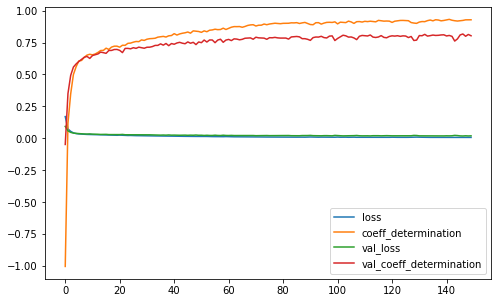

In [67]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [68]:
[loss, r_2] = model1.evaluate(test_data, test_labels, verbose=0)
print("Accuracy on test set for SEQUENTIAL: {:2f}".format(r_2))

Accuracy on test set for SEQUENTIAL: 0.933936


CONVOLUTIONAL 1D MODEL

In [69]:
print(train_data.shape)
print(train_data[0].shape)
print(train_data[0])

(566, 28)
(28,)
[0.         0.         1.         0.         0.         0.
 0.         0.18549634 0.2371093  0.95061267 0.26438604 0.03236613
 0.06688563 0.         0.         0.00650876 0.25328273 0.
 0.         0.         0.02116958 0.69267542 0.56401393 0.21565731
 0.04854369 0.01886792 0.04255319 0.        ]


In [70]:
sample_size = train_data.shape[0] # number of samples in train set
time_steps  = train_data.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = train_data.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (566, 28, 1)
1 Sample shape:
 (28, 1)
An example sample:
 [[0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.18549634]
 [0.2371093 ]
 [0.95061267]
 [0.26438604]
 [0.03236613]
 [0.06688563]
 [0.        ]
 [0.        ]
 [0.00650876]
 [0.25328273]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.02116958]
 [0.69267542]
 [0.56401393]
 [0.21565731]
 [0.04854369]
 [0.01886792]
 [0.04255319]
 [0.        ]]


In [71]:
test_data_reshaped = test_data.reshape(test_data.shape[0],test_data.shape[1],1)
test_data_final_reshaped = test_data_final.reshape(test_data_final.shape[0],test_data_final.shape[1],1)
print(test_data_final_reshaped.shape)
print(test_data_reshaped.shape)

(351, 28, 1)
(50, 28, 1)


In [72]:
def build_conv1D_model():

  n_timesteps = train_data_reshaped.shape[1] #13
  n_features  = train_data_reshaped.shape[2] #1 
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
  model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=[coeff_determination])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 22, 64)            512       
                                                                 
 dropout_4 (Dropout)         (None, 22, 64)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 20, 32)            6176      
                                                                 
 Conv1D_3 (Conv1D)           (None, 19, 16)            1040      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 9, 16)            0         
                                                                 
 flatten_4 (Flatten)         (None, 144)               0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [73]:
history = model_conv1D.fit(train_data_reshaped,
                            train_labels,
                            epochs=EPOCHS,
                            validation_split=0.1,
                            verbose=0,
                            )
"""
callbacks=[
                                tf.keras.callbacks.EarlyStopping(
                                    monitor='val_loss',
                                    patience=30
                                )
                            ]
"""

"\ncallbacks=[\n                                tf.keras.callbacks.EarlyStopping(\n                                    monitor='val_loss',\n                                    patience=30\n                                )\n                            ]\n"

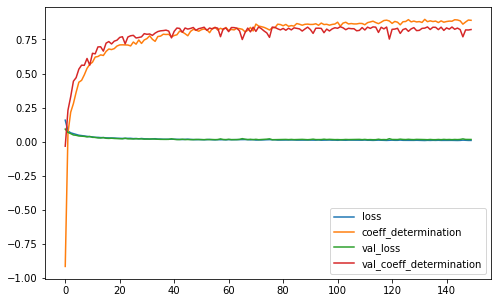

In [74]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [75]:
[loss, r_2] = model_conv1D.evaluate(test_data_reshaped, test_labels, verbose=0)
print("Accuracy on test set for MULTI-CONV_1D: {:2f}".format(r_2))

Accuracy on test set for MULTI-CONV_1D: 0.926052


FUNCTIONAL API (MERGING 2 ABOVE BEST MODELS INTO ONE)

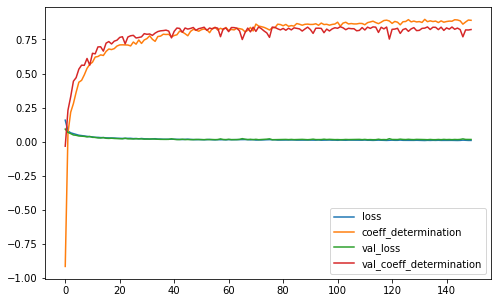

Accuracy on test set:
[0.009410426951944828, 0.8610833287239075]
Accuracy on test set for MULTI-CONV_1D: 0.926052
Accuracy on test set for SEQUENTIAL: 0.933936


In [76]:
############################# Functional API try ################################
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input,BatchNormalization,concatenate, Conv1D,Flatten,MaxPooling1D
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers  
  
#################################################################################  

n_timesteps = train_data_reshaped.shape[1] #13
n_features  = train_data_reshaped.shape[2] #1 
#train_data.shape[1] = 28
    
input_tensor = Input(shape=(train_data.shape[1],), name = 'SEQUENTIAL')
x1 = Dense(64, activation='relu')(input_tensor)
x2 = Dense(32, activation='relu')(x1)
x3 = Dense(1, activation='sigmoid')(x2)

input_tensor2 = Input(shape=(n_timesteps,n_features), name = 'CONV_1D')
y1 = Conv1D(filters=64, kernel_size=7, activation='relu', name="Conv1D_1")(input_tensor2)
y2 = Dropout(0.2)(y1)
y3 = Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2")(y2)
y4 = Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3")(y3)
y5 = MaxPooling1D(pool_size=2, name="MaxPooling1D")(y4)
y6 = Flatten()(y5)
y7 = Dense(32, activation='relu', name="Dense_1")(y6)
y8 = Dense(n_features, name="Dense_2")(y7)

con = concatenate([x3,y8])
a1 = Dense(20, activation='relu')(con)
a2 = Dense(10, activation='relu')(a1)
output = Dense(1, activation='sigmoid', name = 'GOAL_PREDICTIONS')(a2)
model = Model(inputs=[input_tensor, input_tensor2], outputs=output)

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=[coeff_determination])

############################################################################################

model.fit(
    {"SEQUENTIAL": train_data, "CONV_1D": train_data_reshaped},
    {"GOAL_PREDICTIONS": train_labels},
    epochs=EPOCHS,
    validation_split=0.1, verbose=0
)


pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

print('Accuracy on test set:')
print(model.evaluate([test_data, test_data_reshaped], test_labels, verbose=0))

[loss, r_2] = model_conv1D.evaluate(test_data_reshaped, test_labels, verbose=0)
print("Accuracy on test set for MULTI-CONV_1D: {:2f}".format(r_2))

[loss, r_2] = model1.evaluate(test_data, test_labels, verbose=0)
print("Accuracy on test set for SEQUENTIAL: {:2f}".format(r_2))

In [77]:
print(model_conv1D.predict(test_data_reshaped).shape)


(50, 1)


In [78]:
print(model.predict([test_data, test_data_reshaped]).shape)

(50, 1)


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score


sequential_data = np.load("Signals.npz", allow_pickle=True)["a"].item()
train_data = pd.read_csv("metadata_train.csv")

#test_data = pd.read_csv("metadata_test.csv")

y = train_data['CycleToFailureNormalized']
train_index = train_data["SignalID"].to_numpy()
tab1 = []

dlugosc = []
max_val = []
min_val = []

#for smallest(a) to highest(e) of values
amount_e = []
amount_d = []
amount_c = []
amount_b = []
amount_a = []

#for smallest(a) to highest(e) of values
density_amount_e = []
density_amount_d = []
density_amount_c = []
density_amount_b = []
density_amount_a = []

#for smallest(a) to highest(d) of values
num_of_a_changes = []
num_of_b_changes = []
num_of_c_changes = []
num_of_d_changes = []

# standard deviation
std = []
extreme_changes = []
std_a = []
std_b = []
std_c = []

for x in train_index:
    tab1.append(sequential_data[x])
    dlugosc.append(len(sequential_data[x]))
    max_val.append(np.amax(sequential_data[x],axis=0))
    min_val.append(np.amin(sequential_data[x],axis=0))

    amount_e.append((sequential_data[x] >20650).sum())
    amount_d.append(((15000<=sequential_data[x]) &(sequential_data[x] <=20650)).sum())
    amount_c.append(((12500<=sequential_data[x]) &(sequential_data[x] <20650)).sum())
    amount_b.append(((2500<=sequential_data[x]) &(sequential_data[x] <10000)).sum())
    amount_a.append((sequential_data[x] <0).sum())

    density_amount_e.append(((20750<=sequential_data[x])).sum()/len(sequential_data[x]))
    density_amount_d.append(((15000<=sequential_data[x]) &(sequential_data[x] <=20750)).sum()/len(sequential_data[x]))
    density_amount_c.append(((9500<=sequential_data[x]) &(sequential_data[x] <15000)).sum()/len(sequential_data[x]))
    density_amount_b.append(((5000<=sequential_data[x]) &(sequential_data[x] <9500)).sum()/len(sequential_data[x]))
    density_amount_a.append(((0<sequential_data[x]) &(sequential_data[x] <5000)).sum()/len(sequential_data[x]))

    num_of_a_changes.append(((0<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=155))).sum())
    num_of_b_changes.append(((1500<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=2500))).sum())
    num_of_c_changes.append(((2500<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=4000))).sum())
    num_of_d_changes.append(((4000<np.absolute(np.diff(sequential_data[x])))).sum())

    A,B,C = np.array_split(sequential_data[x],3)
    std_a.append(np.std(A,axis=0))
    std_b.append(np.std(B,axis=0))
    std_c.append(np.std(C,axis=0))
    #std_d.append(np.std(D,axis=0))

    a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,r,s,t,u = np.array_split(sequential_data[x],20)
    std = np.array([np.std(a,axis=0),np.std(b,axis=0),np.std(c,axis=0),np.std(d,axis=0),np.std(e,axis=0),np.std(f,axis=0),np.std(g,axis=0),np.std(h,axis=0),np.std(i,axis=0),np.std(j,axis=0),
                    np.std(k,axis=0),np.std(l,axis=0),np.std(m,axis=0),np.std(n,axis=0),np.std(o,axis=0),
                    np.std(p,axis=0),np.std(r,axis=0),np.std(s,axis=0),np.std(t,axis=0),np.std(u,axis=0)])

    if (np.max(std)-np.min(std))>8000:
        extreme_changes.append(int(np.max(std)-np.min(std)))
    else:
        extreme_changes.append(int(0))
 
train_data["dlugosc"] = dlugosc
train_data["max_val"] = max_val
train_data["min_val"] = min_val

train_data["1/3 odchylenie standardowe"] = std_a
train_data["2/3 odchylenie standardowe"] = std_b
train_data["3/3 odchylenie standardowe"] = std_c

train_data["amount_e"] = amount_e
train_data["amount_d"] = amount_d
train_data["amount_c"] = amount_c
train_data["amount_b"] = amount_b
train_data["amount_a"] = amount_a

train_data["density_amount_e"] = density_amount_e
train_data["density_amount_d"] = density_amount_d
train_data["density_amount_c"] = density_amount_c
train_data["density_amount_b"] = density_amount_b
train_data["density_amount_a"] = density_amount_a

train_data["num_of_a_changes"] = num_of_a_changes
train_data["num_of_b_changes"] = num_of_b_changes
train_data["num_of_c_changes"] = num_of_c_changes
train_data["num_of_d_changes"] = num_of_d_changes

train_data["extreme_changes"] = extreme_changes

X = train_data
X.drop('CycleToFailureNormalized', inplace=True, axis=1)
X.drop('SignalID', inplace=True, axis=1)
X.drop('ToolIndex', inplace=True, axis=1)
print(X.head())

X_train, X_test, y_train, y_test = train_data_copy,test_data_copy,train_labels_copy,test_labels_copy

#print(X_train.shape); print(X_test.shape)
#X_train, X_test, y_train, y_test = train_data, test_data, train_labels, test_labels


"""
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""

Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='r2',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

###################################################################################

SVR = svm.SVR(C=1.2, degree=2)
SVR = SVR.fit(X_train, y_train)
pred2 = SVR.predict(X_test)
print("Accuracy on test set for SVR: %.2f" % (r2_score(y_test, pred2)*100))


###################################################################################

ETR =  ExtraTreesRegressor(n_estimators=100,max_depth=20,n_jobs=3,min_samples_split=2)
                           
ETR.fit(X_train, y_train)
pred8 = ETR.predict(X_test)
print("Accuracy on test set for ETR: %.2f" % (r2_score(y_test, pred8) * 100))

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 3}

###################################################################################

XGB = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.12, max_delta_step=0,
             max_depth=5, min_child_weight=1,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.85,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGB = XGB.fit(X_train, y_train)
pred2 = XGB.predict(X_test)
print("Accuracy on test set for XGB: %.2f" % (r2_score(y_test, pred2)*100))

###################################################################################

GBR = GradientBoostingRegressor(max_depth= 5, learning_rate = 0.12, n_estimators = 500,
                                subsample=0.85,min_samples_split=2)
GBR = GBR.fit(X_train, y_train)
pred2 = GBR.predict(X_test)
print("Accuracy on test set for GBR: %.2f" % (r2_score(y_test, pred2)*100))
#######################################################################################

from catboost import CatBoostRegressor

CBR =  CatBoostRegressor(
    learning_rate= 0.005,
    depth=4,
    l2_leaf_reg= 1,
    verbose = False,
    early_stopping_rounds= 200)
                           
CBR.fit(X_train, y_train)
pred8 = CBR.predict(X_test)
print("Accuracy on test set for CBR: %.2f" % (r2_score(y_test, pred8) * 100))


##################################################################################
from lightgbm import LGBMRegressor

LGBM =  LGBMRegressor( num_leaves= 39,
    max_depth= 2,
    learning_rate= 0.13705339989856127,
    n_estimators= 273)
                           
LGBM.fit(X_train, y_train)
pred8 = LGBM.predict(X_test)
print("Accuracy on test set for LGBM: %.2f" % (r2_score(y_test, pred8) * 100))


##################################################################################

# estimators = [('a', SVR), ('b', ETR), ('C', GBR),('E',XGB )] # VR:0.858 // STACK:0.841 
# estimators = [('a', SVR), ('b', ETR), ('C', GBR),('E',XGB )] # VR:0.847 // STACK:0.846 

VR = VotingRegressor([('a', SVR), ('b', ETR), ('C', GBR),('E',XGB )],weights=(0.15,0.7,0.2,0.25))
VR = VR.fit(X_train, y_train)
pred2 = VR.predict(X_test)
print("Accuracy on test set for VR: %.2f" % (r2_score(y_test, pred2)*100))

VR1 = VotingRegressor([('a',  SVR), ('b', ETR), ('C', GBR),('E',CBR )],weights=(0.15,0.7,0.2,0.25))
VR1 = VR1.fit(X_train, y_train)
pred2 = VR1.predict(X_test)
print("Accuracy on test set for VR1: %.2f" % (r2_score(y_test, pred2)*100))\

VR2 = VotingRegressor([('a',  SVR), ('b', ETR), ('C', GBR),('D',LGBM ),('E',XGB )],weights=(0.05,0.5,0.12,0.15,0.2))
VR2 = VR2.fit(X_train, y_train)
predvr = VR2.predict(X_test)
print("Accuracy on test set for VR2: %.2f" % (r2_score(y_test, predvr)*100))

   ADOC [mm]  RDOC [mm]  HardnessMean [HRC]  ToolHolderLength [mm]  \
0          5        8.0               36.67                     80   
1          5        8.0               36.67                     80   
2          5        8.0               36.67                     80   
3          5        8.0               36.67                     80   
4          5        8.0               36.67                     80   

   ToolRotation [rpm]  FeedRate [mm/min]  ToolDiameter [mm]  dlugosc  max_val  \
0                3200                640                 10    53965    12854   
1                3200                640                 10    31815    13385   
2                3200                640                 10    40706    18546   
3                3200                640                 10    36637     9360   
4                3200                640                 10    56097    15579   

   min_val  ...  density_amount_e  density_amount_d  density_amount_c  \
0      296  ...    

In [80]:
#print(pred2.shape)
#print(model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]))
#print()
#print(model_conv1D.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0]))
#print(model1.predict(test_data.reshape(test_data.shape[0])).shape)

final_predictions = (
    0.45 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.4 * VR2.predict(X_test)+
    0.15 * ETR.predict(X_test) 
)
print("Accuracy on test set for A: %.2f" % (r2_score(test_labels, final_predictions)*100))

final_predictions = (
    0.45 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.35 * VR2.predict(X_test)+
    0.2 * ETR.predict(X_test) 
)
print("Accuracy on test set for B: %.2f" % (r2_score(test_labels, final_predictions)*100))


final_predictions = (
    0.55 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.45 * VR2.predict(X_test)
)
print("Accuracy on test set for C: %.2f" % (r2_score(test_labels, final_predictions)*100))

final_predictions = (
    0.5 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.2 * model_conv1D.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0]) +
    0.2 * ETR.predict(X_test) +
    0.1 * VR2.predict(X_test)
)

print("Accuracy on test set for D: %.2f" % (r2_score(test_labels, final_predictions)*100))

final_predictions = (
    0.5 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.2 * model_conv1D.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0]) +
    0.2 * ETR.predict(X_test) +
    0.1 * VR.predict(X_test)
)
print("Accuracy on test set for E: %.2f" % (r2_score(test_labels, final_predictions)*100))

final_predictions = (
    0.5 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.35 * model_conv1D.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0]) +
    0.15 * model1.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0])
)
print("Accuracy on test set for F %.2f" % (r2_score(test_labels, final_predictions)*100))

final_predictions = (
    0.45 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.35 * VR2.predict(X_test)+
    0.15 * model1.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0]) 
)
print("Accuracy on test set for G: %.2f" % (r2_score(test_labels, final_predictions)*100))


# 0.1 * model1.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0]) +

[loss, r_2] = model.evaluate([test_data, test_data_reshaped], test_labels, verbose=0)
print("Accuracy on test set for API: {:2f}".format(r_2))

[loss, r_2] = model_conv1D.evaluate(test_data_reshaped, test_labels, verbose=0)
print("Accuracy on test set for MULTI-CONV_1D: {:2f}".format(r_2))

[loss, r_2] = model1.evaluate(test_data, test_labels, verbose=0)
print("Accuracy on test set for SEQUENTIAL: {:2f}".format(r_2))

ETR =  ExtraTreesRegressor(n_estimators=100,max_depth=20,n_jobs=3,min_samples_split=2)
                           
ETR.fit(X_train, y_train)
pred8 = ETR.predict(X_test)
print("Accuracy on test set for ETR: %.2f" % (r2_score(y_test, pred8) * 100))

Accuracy on test set for A: 91.17
Accuracy on test set for B: 91.24
Accuracy on test set for C: 90.44
Accuracy on test set for D: 91.58
Accuracy on test set for E: 91.58
Accuracy on test set for F 91.79
Accuracy on test set for G: 88.72
Accuracy on test set for API: 0.861083
Accuracy on test set for MULTI-CONV_1D: 0.926052
Accuracy on test set for SEQUENTIAL: 0.933936
Accuracy on test set for ETR: 91.33


In [81]:
### 1 faza testów/ zwyciezcy : B,D,F,G  \ NAJLEPSZY B


final_predictions = (
    0.45 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.35 * VR2.predict(X_test)+
    0.2 * ETR.predict(X_test) 
)
print("Accuracy on test set for B: %.2f" % (r2_score(test_labels, final_predictions)*100))


final_predictions = (
    0.35 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.35 * VR2.predict(X_test)+
    0.3 * ETR.predict(X_test) 
)
print("Accuracy on test set for B1: %.2f" % (r2_score(test_labels, final_predictions)*100))


########################################################################


final_predictions = (
    0.45 * model1.predict([test_data]).reshape(test_data.shape[0]) +
    0.35 * VR2.predict(X_test)+
    0.2 * ETR.predict(X_test) 
)
print("Accuracy on test set for B_Seq: %.2f" % (r2_score(test_labels, final_predictions)*100))


final_predictions = (
    0.35 * model1.predict([test_data]).reshape(test_data.shape[0]) +
    0.35 * VR2.predict(X_test)+
    0.3 * ETR.predict(X_test) 
)
print("Accuracy on test set for B_Seq1: %.2f" % (r2_score(test_labels, final_predictions)*100))



predvr = VR2.predict(X_test)
print("Accuracy on test set for VR2: %.2f" % (r2_score(y_test, predvr)*100))

# 0.1 * model1.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0]) +

Accuracy on test set for B: 91.15
Accuracy on test set for B1: 91.57
Accuracy on test set for B_Seq: 93.11
Accuracy on test set for B_Seq1: 92.90
Accuracy on test set for VR2: 91.11


In [82]:
final_predictions = (
    0.35 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.35 * VR2.predict(X_test)+
    0.3 * ETR.predict(X_test) 
)
print("Accuracy on test set for C: %.2f" % (r2_score(test_labels, final_predictions)*100))

final_predictions = (
    0.3 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.3 * VR2.predict(X_test)+
    0.25 * ETR.predict(X_test) +
    0.15 * model1.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0])
)
print("Accuracy on test set for CS: %.2f" % (r2_score(y_test, final_predictions)*100))


Accuracy on test set for C: 91.57
Accuracy on test set for CS: 92.25


In [83]:

final_predictions = (
    0.3 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.3 * VR2.predict(X_test)+
    0.25 * ETR.predict(X_test) +
    0.15 * model1.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0])
)
print("Accuracy on test set for CS: %.2f" % (r2_score(y_test, final_predictions)*100))


final_predictions = (
    0.25 * model.predict([test_data, test_data_reshaped]).reshape(test_data.shape[0]) +
    0.25 * VR2.predict(X_test)+
    0.25 * ETR.predict(X_test) +
    0.25 * model1.predict(test_data_reshaped).reshape(test_data_reshaped.shape[0])
)
print("Accuracy on test set for CS2: %.2f" % (r2_score(y_test, final_predictions)*100))

print(y_test)
print("############")
print(final_predictions)


Accuracy on test set for CS: 92.25
Accuracy on test set for CS2: 92.67
[0.22147651 0.1984127  0.55       0.92857143 0.1031746  0.66956522
 0.41269841 0.57142857 0.43650794 0.51677852 0.42281879 0.62416107
 0.7114094  0.77391304 0.22818792 0.63265306 0.56375839 0.70434783
 0.24137931 0.12698413 0.44827586 0.04697987 0.47169811 0.34228188
 1.         0.87755102 0.02380952 0.66666667 0.73809524 0.48322148
 0.45283019 0.5033557  0.23478261 0.29530201 0.525      0.59130435
 0.77777778 0.41610738 0.02040816 0.83478261 0.79865772 0.12751678
 0.475      0.81208054 0.61904762 0.85234899 0.60869565 0.30872483
 0.14285714 0.06086957]
############
[0.21198202 0.20387617 0.56065447 0.87744079 0.16995959 0.57890815
 0.46865315 0.44411088 0.46011686 0.55340685 0.28208927 0.58046713
 0.62722691 0.76939042 0.26333495 0.74674925 0.58649175 0.5916404
 0.30521216 0.18418377 0.43444224 0.16126017 0.52924589 0.30218693
 0.88663976 0.76826514 0.12985974 0.58961608 0.69527703 0.48983592
 0.3946522  0.51750924

GENEROWANIE PLIKÓW DO WYSŁANIA

In [84]:
"""
final_predictions = (
    0.25 * model.predict([test_data_final, test_data_final_reshaped]).reshape(test_data_final.shape[0]) +
    0.25 * VR2.predict(test_data_final)+
    0.25 * ETR.predict(test_data_final) +
    0.25 * model1.predict(test_data_final_reshaped).reshape(test_data_final_reshaped.shape[0])
)
print(final_predictions.shape)

final_tab = pd.DataFrame() 
final_tab['SignalID'] = test_index
final_tab['CycleToFailureNormalized'] = final_predictions
final_tab = final_tab

pd.DataFrame(final_tab).to_csv('SJ_5.csv')

"""

"\nfinal_predictions = (\n    0.25 * model.predict([test_data_final, test_data_final_reshaped]).reshape(test_data_final.shape[0]) +\n    0.25 * VR2.predict(test_data_final)+\n    0.25 * ETR.predict(test_data_final) +\n    0.25 * model1.predict(test_data_final_reshaped).reshape(test_data_final_reshaped.shape[0])\n)\nprint(final_predictions.shape)\n\nfinal_tab = pd.DataFrame() \nfinal_tab['SignalID'] = test_index\nfinal_tab['CycleToFailureNormalized'] = final_predictions\nfinal_tab = final_tab\n\npd.DataFrame(final_tab).to_csv('SJ_5.csv')\n\n"